Zomato Data Analysis Project

1. Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Create the data frame

In [4]:
df = pd.read_csv('Zomato data .csv')
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [5]:
df.shape

(148, 7)

3. Converting rate column

In [6]:
def handleRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

df['rate'] = df['rate'].apply(handleRate)

In [7]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


4. Types of restaurants

Text(0.5, 0, 'Types of restaurants')

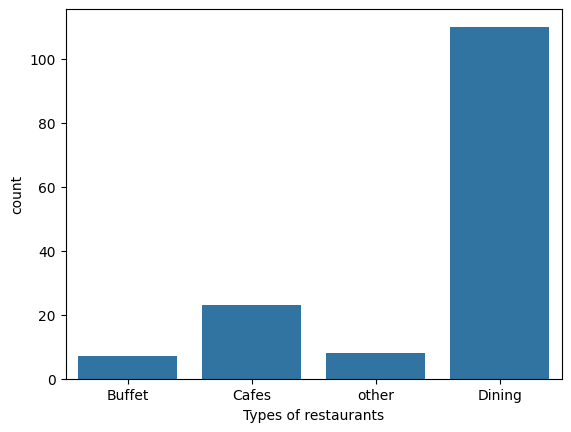

In [8]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel('Types of restaurants')

Conclusion: Majority of restaurants fall under dining category

Text(0, 0.5, 'Votes')

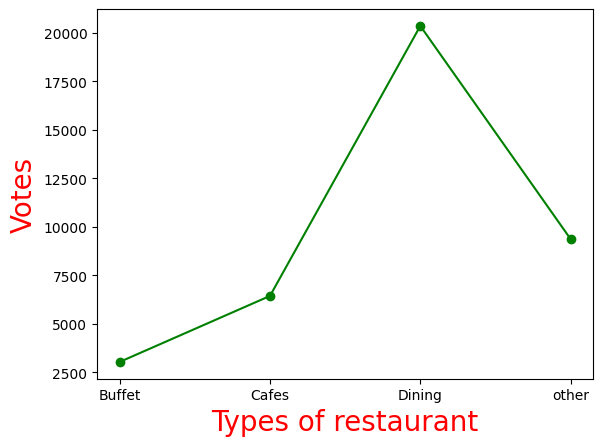

In [9]:
grouped_data= df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':grouped_data})
plt.plot(result, c='green',marker='o')
plt.xlabel('Types of restaurant', c='red',size=20)
plt.ylabel('Votes', c='red', size=20)

Conclusion: Dining restaurants has received maximum votes

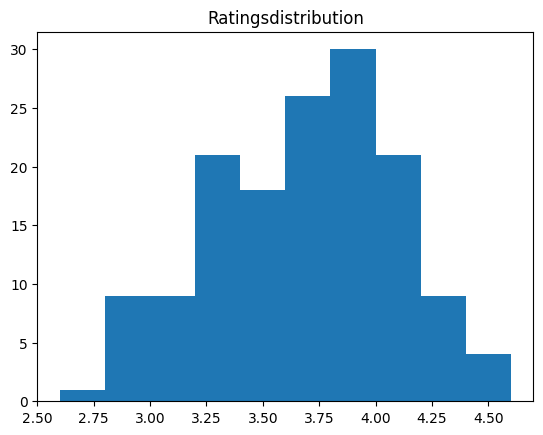

In [12]:
plt.hist(df['rate'],bins=10)
plt.title('Ratingsdistribution')
plt.show()

Conclusion:The majority restaurants have ratings between 3.5 to 4

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

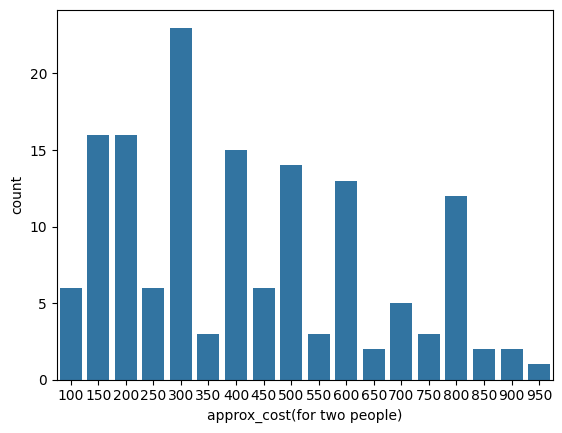

In [16]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)

Conclusion: The majority of couples prefer restaurants with cost of 300/- rupees

<Axes: xlabel='online_order', ylabel='rate'>

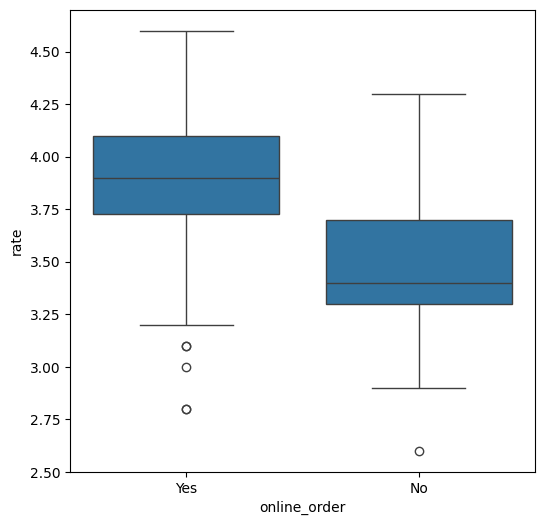

In [17]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate', data=df)

Conclusion: Offline orders received lower ratings as compared to online ratings

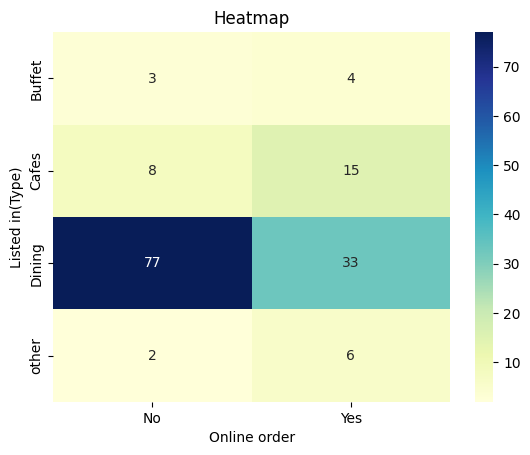

In [19]:
pivot_table=df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap='YlGnBu',fmt='d')
plt.title('Heatmap')
plt.xlabel('Online order')
plt.ylabel('Listed in(Type)')
plt.show()